In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.integrate import odeint
from scipy.integrate import RK45
from scipy.integrate import solve_ivp

In [2]:
# Part A, recreating results from last homework

def shoot_algorithm(y, x, epsilon):
    return [y[1], ((x**2) - epsilon)*y[0]]

tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm']
L = 4 

# Defining our interval of x-values
xspan = [-L, L]

# Defining our partition of our interval [-L, L]
x_partition = np.linspace(xspan[0], xspan[1], (xspan[1] - xspan[0]) * 10 + 1)

# Initializing our vector of eigenvalues and matrix of eigenvectors
epsilon_vector = np.zeros(5)
solution_vector = np.zeros((81, 5))

epsilon_start = 0.1

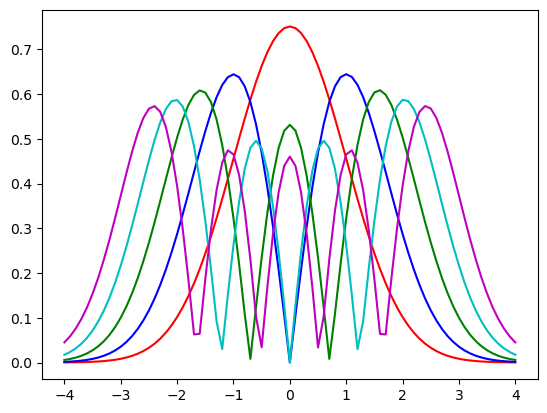

In [3]:
# Inner for-loop finding each of the 5 modes
for modes in range(1,6):
    epsilon = epsilon_start
    d_epsilon = 0.01
    # Inner-for loop finding epsilon for each mode
    for i in range(1000):
        phi0 = [1, np.sqrt(L**2 - epsilon)]
        sol = solve_ivp(lambda x,y: shoot_algorithm(y, x, epsilon), t_span = [-L,L], y0 = phi0, t_eval = x_partition)
        phi = sol.y.T
        x_vals = sol.t
        bc = phi[-1, 1] + np.sqrt(L**2 - epsilon) * phi[-1,0]
        if abs(bc) < tol:
            epsilon_vector[modes - 1] = epsilon
            break
        if (-1)**(modes + 1) * bc > 0:
            epsilon += d_epsilon
        else:
            epsilon -= d_epsilon / 2
            d_epsilon /= 2
    epsilon_start = epsilon + 0.1
    norm = np.trapz(phi[:, 0] * phi[:, 0], x_partition)
    solution_vector[:, (modes - 1)] = abs(phi[:, 0] / np.sqrt(norm))
    plt.plot(x_partition, abs(phi[:, 0] / np.sqrt(norm)), col[modes - 1])
plt.show()

A1 = solution_vector
A2 = epsilon_vector

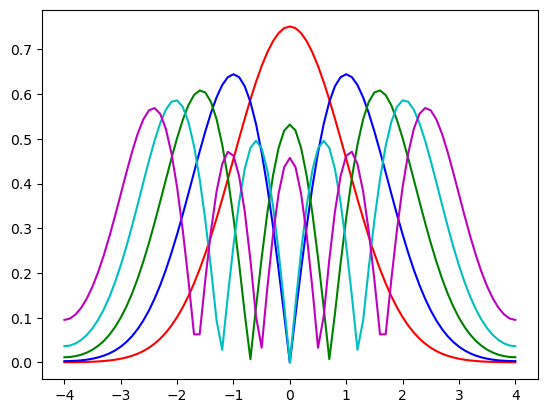

In [4]:
# Part B

N = 81
dx = 0.1
L= 4

x_span = [-L, L]
x_partition = np.linspace(x_span[0], x_span[1], (x_span[1] - x_span[0]) * 10 + 1)

# Creating matrix A
A = np.zeros((N-2, N-2))
for j in range(0, N - 2):
    A[j,j] = -2 - ((x_partition[j + 1]) ** 2 * 0.1**2)

for j in range(0, N-3):
    A[j+1, j] = 1
    A[j, j + 1] = 1

A[0,0] = -(2/3) - (x_partition[1]**2 * 0.1**2)
A[N-3,N-3] = -(2/3) - (x_partition[N-2]**2 * 0.1**2)
A[0,1] = 2/3
A[N-3, N - 4] = 2/3

# Dividing by -dx^2
A = A / (-(0.1)**2)

# Finding first five eigenvalues and eigenvectors
A4, A3 = eigs(A, k =5, which = "SM")
A4 = A4.real
A3 = A3.real
A3 = np.append(A3, [[(4/3) * A3[N-3][0] - (1/3) * A3[N-4][0],
                     (4/3) * A3[N-3][1] - (1/3) * A3[N-4][1],
                     (4/3) * A3[N-3][2] - (1/3) * A3[N-4][2],
                     (4/3) * A3[N-3][3] - (1/3) * A3[N-4][3],
                     (4/3) * A3[N-3][4] - (1/3) * A3[N-4][4]]], axis = 0)
A3 = np.append([[(4/3) * A3[0][0] - (1/3) * A3[1][0],
                     (4/3) * A3[0][1] - (1/3) * A3[1][1],
                     (4/3) * A3[0][2] - (1/3) * A3[1][2],
                     (4/3) * A3[0][3] - (1/3) * A3[1][3],
                     (4/3) * A3[0][4] - (1/3) * A3[1][4]]], A3, axis = 0)

col = ['r', 'b', 'g', 'c', 'm']

# Normalization of eigenfunctions

plt.figure()
for j in range(5):
    norm = np.trapz(A3[:, j] * A3[:, j], x_partition)
    A3[:, j] = abs(A3[:, j] / np.sqrt(norm))
    plt.plot(x_partition, A3[:, j], col[j])

In [5]:
# Part C

def shoot_2(y, x, epsilon, gamma):
    return [y[1], (gamma * y[0]**2 + (x**2 - epsilon))*y[0]]

A6 = np.zeros(2)
A5 = np.zeros((41,2))
A8 = np.zeros(2)
A7 = np.zeros((41,2))

L = 2

x_span = [-L, L]
x_partition = np.linspace(x_span[0], x_span[1], (x_span[1] - x_span[0]) * 10 + 1)

In [6]:
for gamma in [-0.05, 0.05]:
    epsilon_start = 0.1
    A_start = 1e-6
    for modes in range(1,3):
        A = A_start
        dA = 0.01
        for a in range(1000):
            epsilon = epsilon_start
            d_epsilon = 0.2
            for b in range(1000):
                phi0 = [A, A * np.sqrt(L**2 - epsilon)]
                sol = solve_ivp(lambda x,y: shoot_2(y, x, epsilon, gamma), t_span = [-L,L], y0 = phi0, t_eval = x_partition)
                phi = sol.y.T
                x_vals = sol.t
                bc = phi[-1, 1] + np.sqrt(L**2 - epsilon) * phi[-1,0]
                if abs(bc) < tol:
                    break
                if (-1)**(modes + 1) * bc > 0:
                    epsilon += d_epsilon
                else:
                    epsilon -= d_epsilon
                    d_epsilon /= 2
            norm = np.abs(np.trapz(phi[:, 0] * phi[:, 0], x_vals))
            if abs(norm - 1) < tol:
                break
            if norm < 1:
                A += dA
            else:
                A -= dA/2
                dA /= 2
        epsilon_start = epsilon + 0.3
        if gamma == -0.05:
            A7[:, modes - 1] = np.abs(phi[:, 0]) / np.sqrt(norm)
            A8[modes - 1] = epsilon
        else:
            A5[:, modes - 1] = np.abs(phi[:,0]) / np.sqrt(norm)
            A6[modes - 1] = epsilon

In [7]:
# Part D
def rhs_e(x,y, epsilon):
    return [y[1], (x**2 - epsilon)*y[0]]

L = 2
x_span = [-L, L]
epsilon = 1
A = 1
y0 = [A, A * np.sqrt(L**2 - epsilon)]
tols = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

dt45, dt23, dtRadau, dtBDF = [],[],[],[]
for tol in tols:
    options = {'rtol': tol, 'atol': tol}
    sol45 = solve_ivp(rhs_e, x_span, y0, method = 'RK45', args = (epsilon,), **options)
    sol23 = solve_ivp(rhs_e, x_span, y0, method = 'RK23', args = (epsilon,), **options)
    solRadau = solve_ivp(rhs_e, x_span, y0, method = 'Radau', args = (epsilon,), **options)
    solBDF = solve_ivp(rhs_e, x_span, y0, method = 'BDF', args = (epsilon,), **options)

    dt45.append(np.mean(np.diff(sol45.t)))
    dt23.append(np.mean(np.diff(sol23.t)))
    dtRadau.append(np.mean(np.diff(solRadau.t)))
    dtBDF.append(np.mean(np.diff(solBDF.t)))

fit45 = np.polyfit(np.log(dt45), np.log(tols), 1)
fit23 = np.polyfit(np.log(dt23), np.log(tols), 1)
fitRadau = np.polyfit(np.log(dtRadau), np.log(tols), 1)
fitBDF = np.polyfit(np.log(dtBDF), np.log(tols), 1)

A9 = np.array([fit45[0], fit23[0], fitRadau[0], fitBDF[0]])

In [8]:
# Part E
import math
L = 4

def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

In [9]:
x = np.arange(-L, L + 0.1, 0.1)
h = np.array([np.ones_like(x), 2*x, 4*(x**2) - 2, 8*(x**3) - 12 * x, 16*(x**4) - 48 * (x**2) + 12])
phi = np.zeros((81, 5))

for j in range(5):
    phi[:, j] = np.exp(x**2 / -2) * h[j, :] / np.sqrt(factorial(j) * 2**j * np.sqrt(math.pi))

erphi_a = np.zeros(5)
erphi_b = np.zeros(5)
er_epsilon_a = np.zeros(5)
er_epsilon_b = np.zeros(5)

for j in range(5):
    erphi_a[j] = np.trapz((abs(A1[:, j]) - abs(phi[:,j]))**2, x)
    erphi_b[j] = np.trapz((abs(A3[:, j]) - abs(phi[:,j]))**2, x)
    er_epsilon_a[j] = 100 * abs((A2[j] - (2 * (j+1) - 1))) / (2 * (j+1) - 1)
    er_epsilon_b[j] = 100 * abs((A4[j] - (2 * (j+1) - 1))) / (2 * (j+1) - 1)

A10 = erphi_a
A11 = er_epsilon_a
A12 = erphi_b
A13 = er_epsilon_b